In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid=pd.read_csv("Downloads/case-hosp-death.csv")
covid.head()

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,02/29/2020,1,12,0
1,03/01/2020,1,4,0
2,03/02/2020,0,22,0
3,03/03/2020,2,19,0
4,03/04/2020,5,21,0


In [3]:
covid['Date'] = pd.to_datetime(covid['DATE_OF_INTEREST'])
timeseries = covid[covid['Date'] <= '2020-04-06']
timeseries = timeseries[['Date', 'HOSPITALIZED_COUNT']]
timeseries = timeseries.rename(columns = {'HOSPITALIZED_COUNT' : 'Hospitalized Count'})
timeseries.set_index('Date', inplace = True)
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2020-02-29 to 2020-04-06
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Hospitalized Count  38 non-null     int64
dtypes: int64(1)
memory usage: 608.0 bytes


In [4]:
covid

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,Date
0,02/29/2020,1,12,0,2020-02-29
1,03/01/2020,1,4,0,2020-03-01
2,03/02/2020,0,22,0,2020-03-02
3,03/03/2020,2,19,0,2020-03-03
4,03/04/2020,5,21,0,2020-03-04
...,...,...,...,...,...
90,05/29/2020,423,85,28,2020-05-29
91,05/30/2020,229,43,28,2020-05-30
92,05/31/2020,137,27,8,2020-05-31
93,06/01/2020,121,13,7,2020-06-01


In [5]:
test_df=covid[38:48]
test=test_df[['Date','HOSPITALIZED_COUNT']]
test = test.rename(columns = {'HOSPITALIZED_COUNT' : 'Hospitalized Count'})
test.set_index('Date',inplace=True)

2020-04-07    1592.137943
2020-04-08    1578.291265
2020-04-09    1603.575853
2020-04-10    1563.965070
2020-04-11    1461.517609
2020-04-12    1494.996267
2020-04-13    1651.334328
2020-04-14    1592.137943
2020-04-15    1578.291265
2020-04-16    1603.575853
Freq: D, dtype: float64


C:\Users\Adobe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Adobe\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


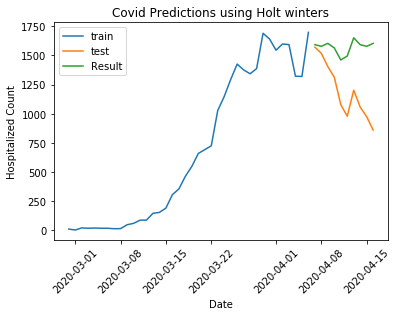

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(timeseries,seasonal='additive', seasonal_periods=7)
model_fit = model.fit()
# make prediction
result=model_fit.forecast(len(test))
yhat = model_fit.predict(test.index[0], test.index[-1])
print(yhat)

fig1 , ax= plt.subplots()
ax.plot(timeseries,label='train')
ax.plot(test,label='test')
ax.plot(result,label='Result')
plt.legend(loc='upper left')
plt.title('Covid Predictions using Holt winters')
plt.ylabel('Hospitalized Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

In [7]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,38
Model:,ExponentialSmoothing,SSE,407263.186
Optimized:,True,AIC,370.626
Trend:,None,BIC,385.364
Seasonal:,Additive,AICC,380.780
Seasonal Periods:,7,Date:,"Sat, 18 Jul 2020"
Box-Cox:,False,Time:,16:23:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7894737,alpha,True
smoothing_seasonal,0.2105263,gamma,True


In [8]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [9]:
mean_absolute_percentage_error(test,result)

36.85070579304165

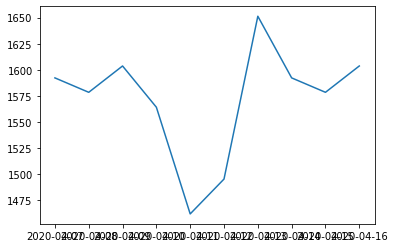

In [10]:
plt.plot(result)

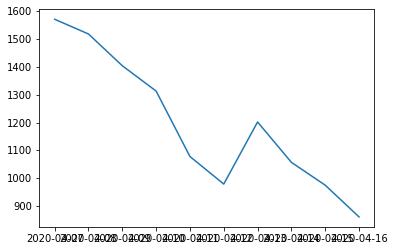

In [11]:
plt.plot(test)

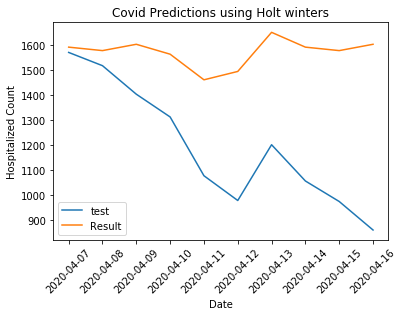

In [12]:
fig1 , ax= plt.subplots()
#ax.plot(timeseries,label='train')
ax.plot(test,label='test')
ax.plot(result,label='Result')
plt.legend(loc='bottom left')
plt.title('Covid Predictions using Holt winters')
plt.ylabel('Hospitalized Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()